In [1]:
import seaborn as sns

In [2]:
tips  = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


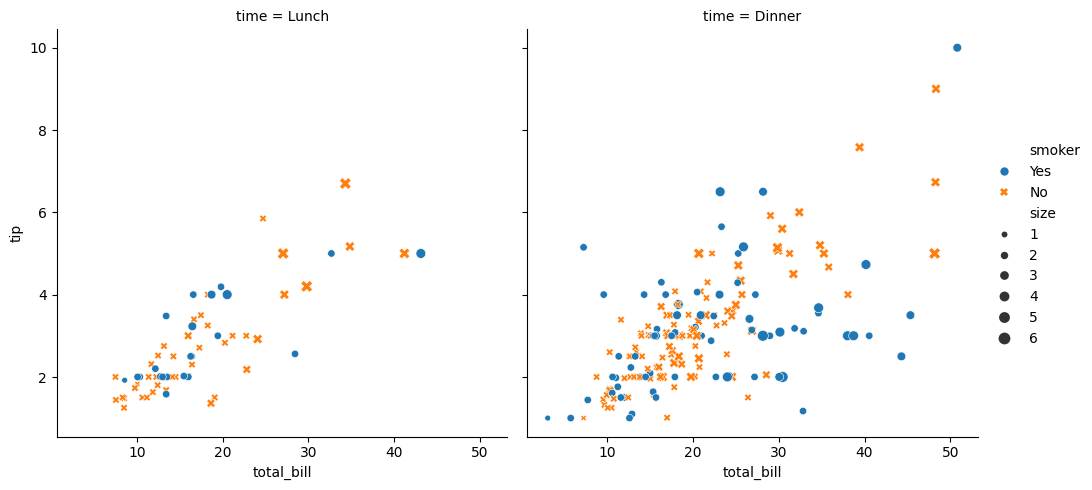

In [3]:
# create visulization 
sns.relplot(
    data=tips,
    x='total_bill',y='tip',col='time',
    hue='smoker',style='smoker',size='size',
)

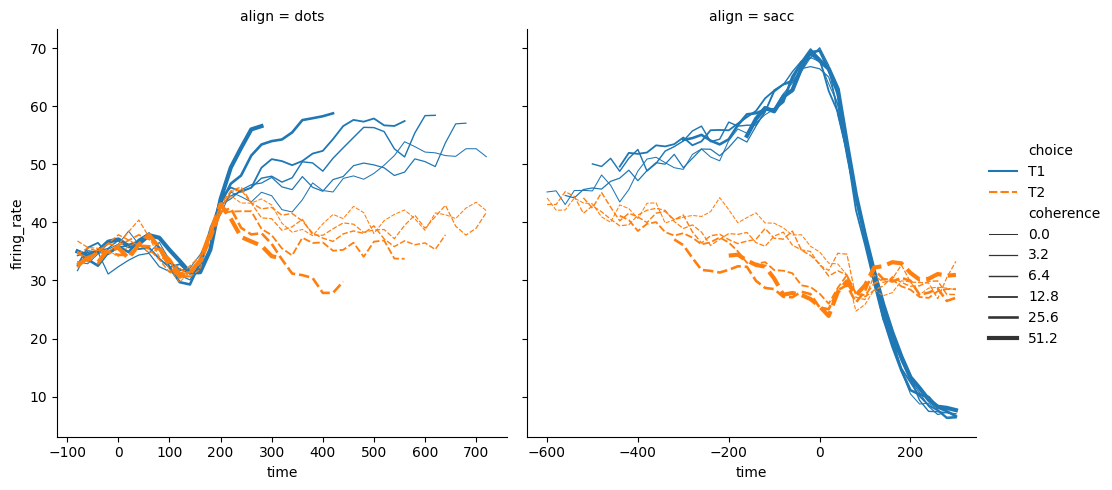

In [4]:
dots = sns.load_dataset('dots')

sns.relplot(
    data=dots,kind='line',
    x='time',y='firing_rate',col='align',
    hue='choice',size='coherence',style='choice',
    facet_kws=dict(sharex=False),
)

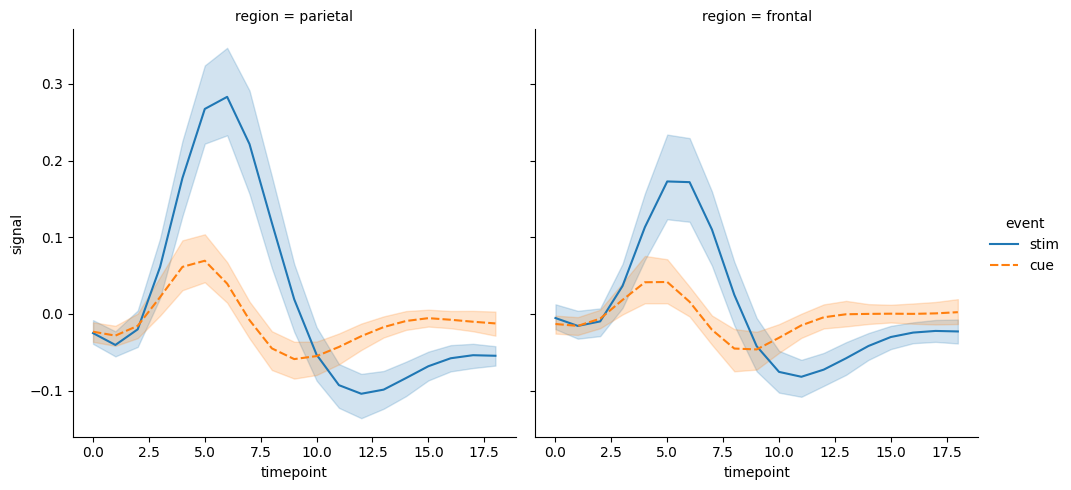

In [5]:
fmri = sns.load_dataset('fmri')

sns.relplot(
    data=fmri,kind='line',
    x='timepoint',y='signal',col='region',
    hue='event',style='event',
)

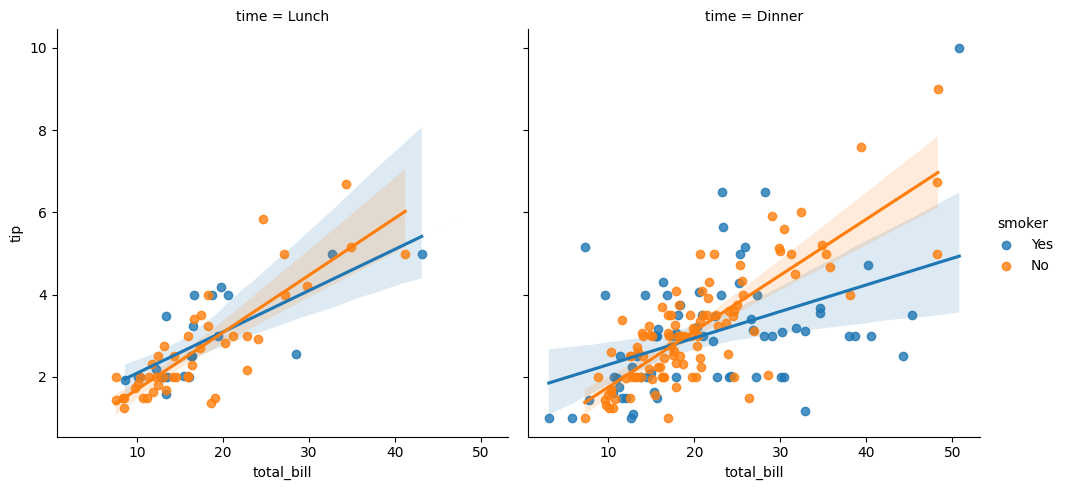

In [6]:
sns.lmplot(data=tips,x='total_bill',y='tip',col='time',hue='smoker')

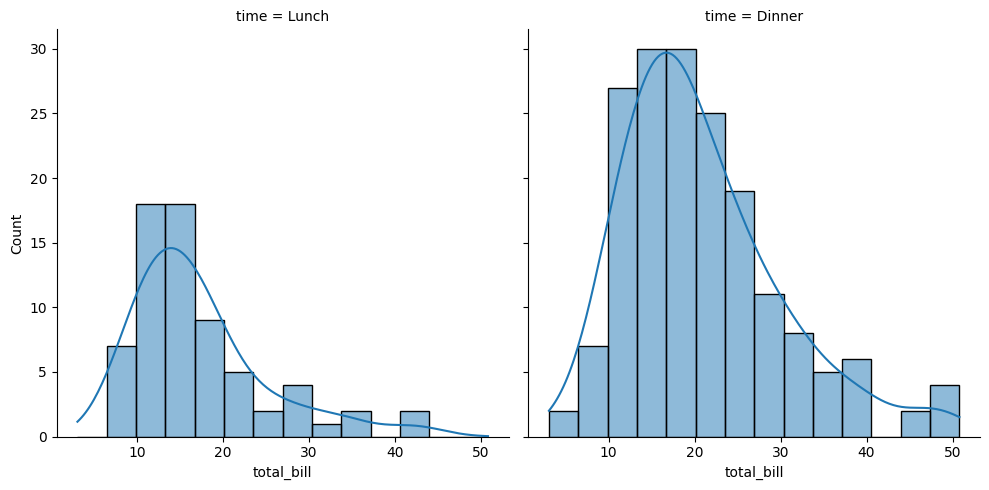

In [8]:
# Distributional Representations
sns.displot(data=tips,x='total_bill',col='time',kde=True)

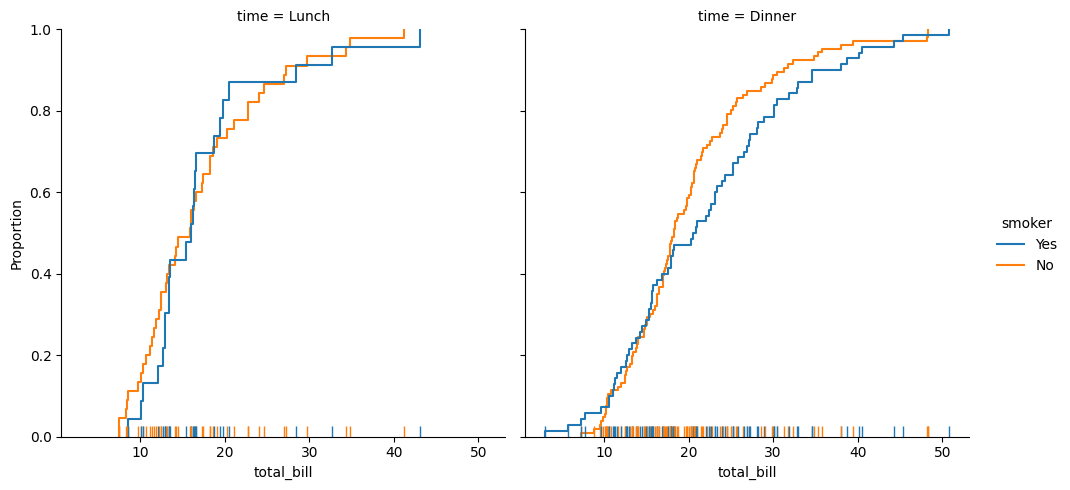

In [9]:
sns.displot(data=tips,kind='ecdf',x='total_bill',col='time',hue='smoker',rug=True)

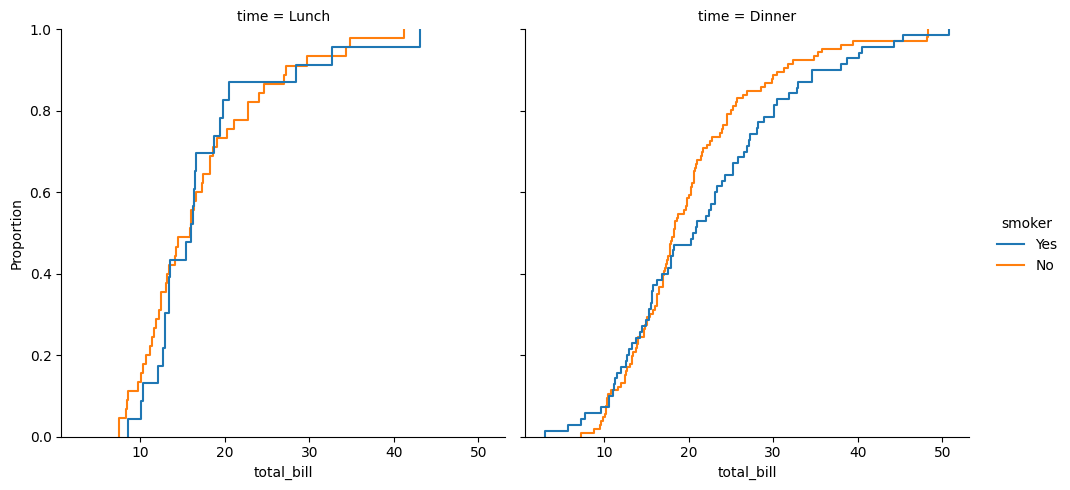

In [10]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=False)

# plots for Categorical data

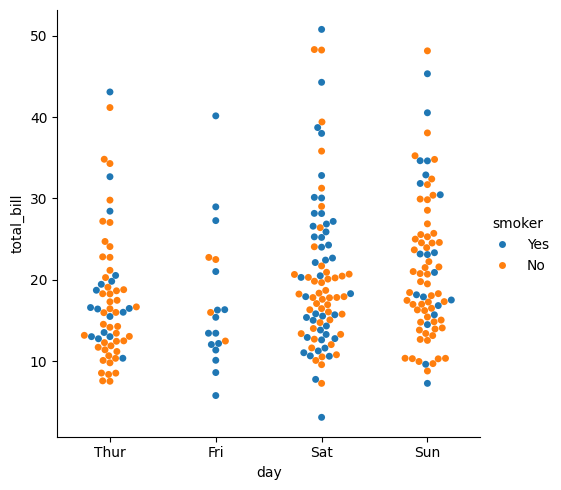

In [12]:
sns.catplot(data=tips,kind='swarm',x='day',y='total_bill',hue='smoker')

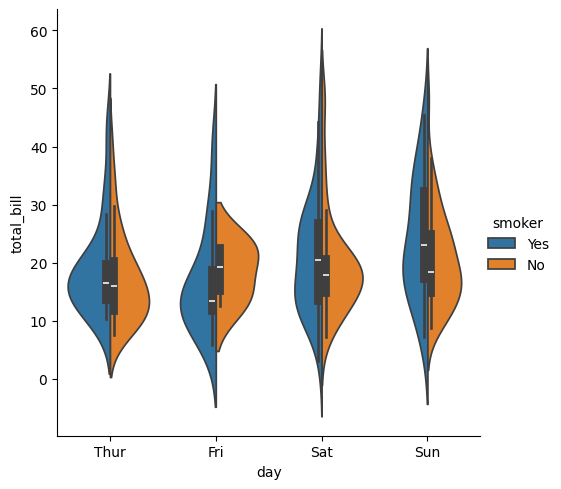

In [13]:
sns.catplot(data=tips,kind='violin',x='day',y='total_bill',hue='smoker',split=True)

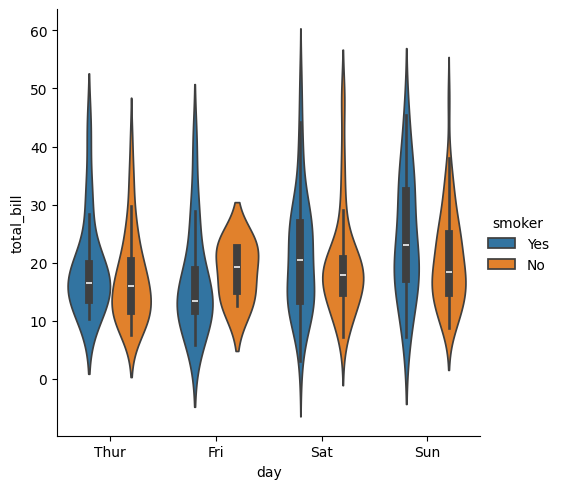

In [14]:
sns.catplot(data=tips,kind='violin',x='day',y='total_bill',hue='smoker',split=False)

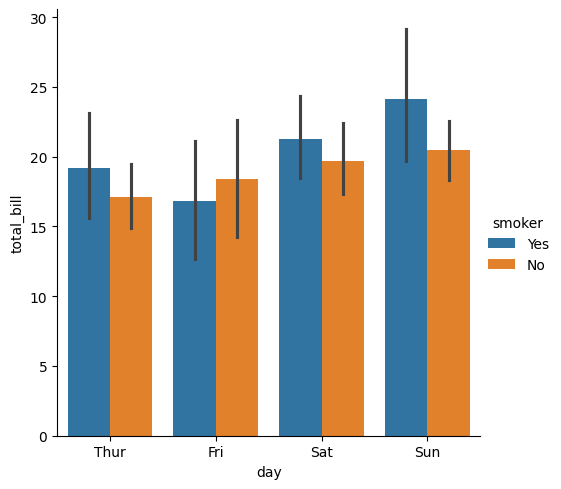

In [15]:
sns.catplot(data=tips,kind='bar',x='day',y='total_bill',hue='smoker')

# Multivariate views on complex datasets

In [16]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [19]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [20]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

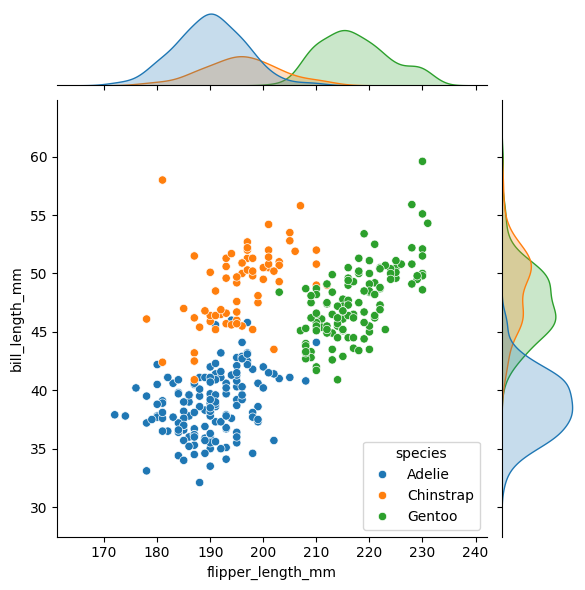

In [21]:
sns.jointplot(data=penguins,x='flipper_length_mm',y='bill_length_mm',hue='species')

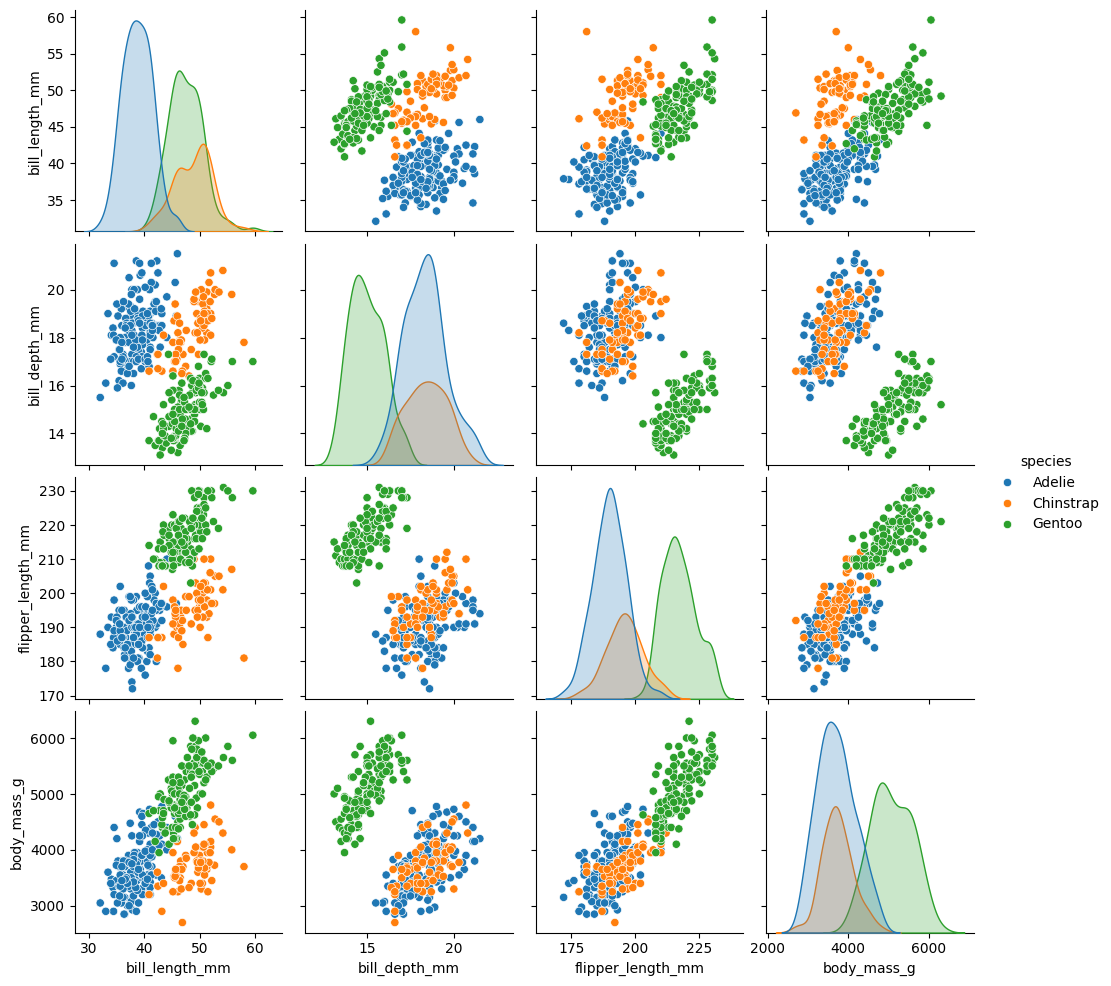

In [23]:
sns.pairplot(data=penguins,hue='species')

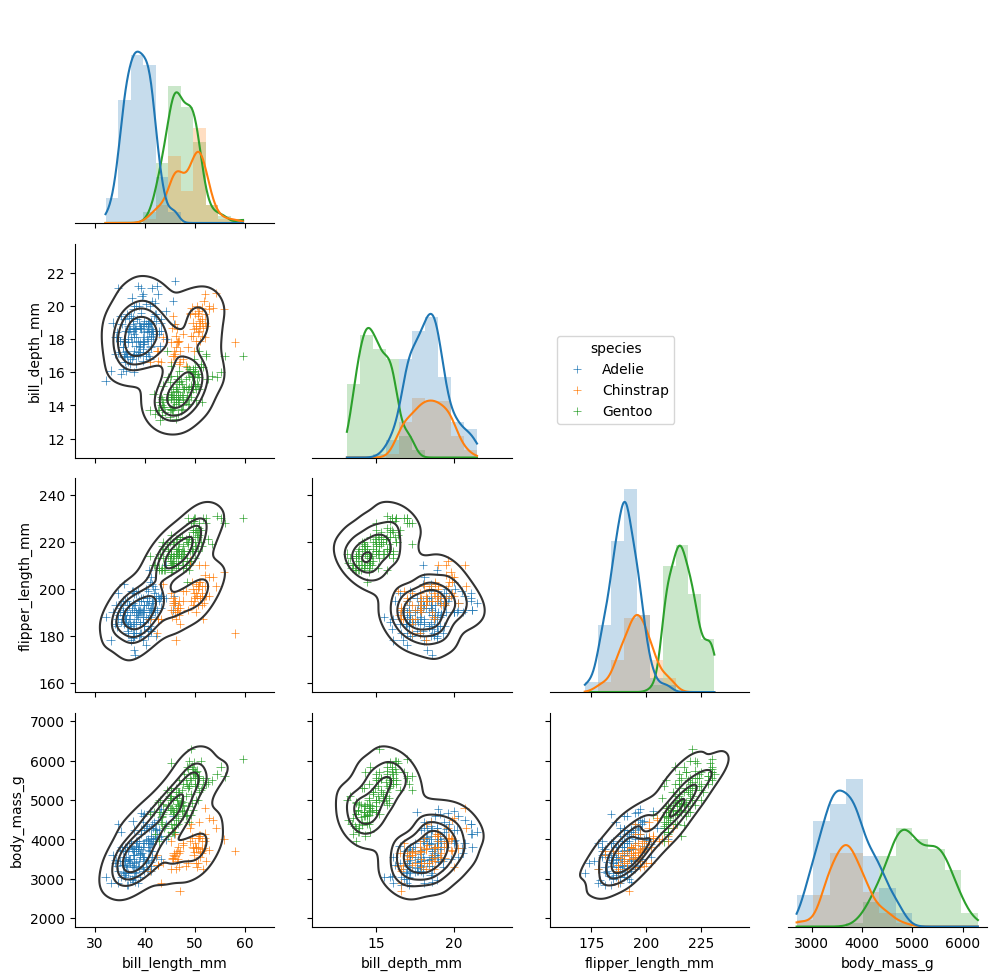

In [26]:
g=sns.PairGrid(penguins,hue='species',corner=True)
g.map_lower(sns.kdeplot,hue=None,levels=5,color='.2')
g.map_lower(sns.scatterplot,marker='+')
g.map_diag(sns.histplot,element='step',linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

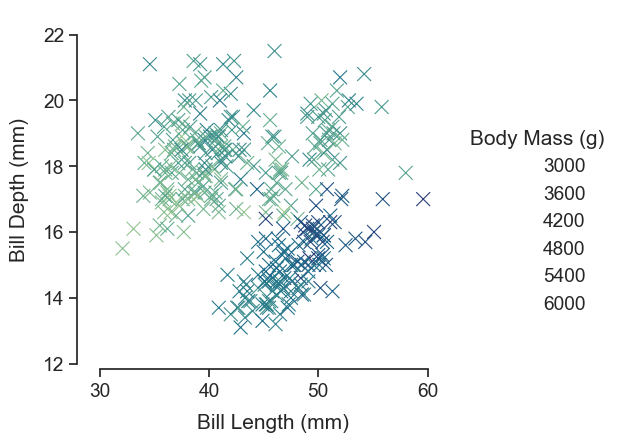

In [29]:
sns.set_theme(style='ticks',font_scale=1.25)
g=sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels('Bill Length (mm)','Bill Depth (mm)',labelpad=10)
g.legend.set_title('Body Mass (g)')
g.figure.set_size_inches(6.5,4.5)
g.ax.margins(.15)
g.despine(trim=True)

In [31]:
sns.set_theme(style='ticks')

#load the example dataset for Anscombe's quartet
df = sns.load_dataset('anscombe')

df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


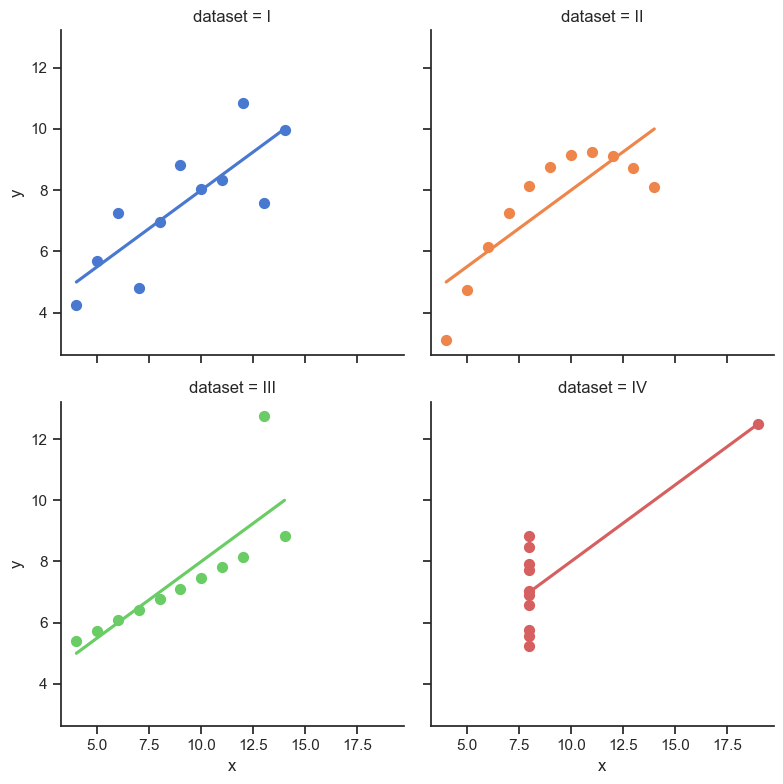

In [32]:
# show the results
sns.lmplot(
    data=df,x='x',y='y',col='dataset',hue='dataset',
    col_wrap=2,palette='muted',ci=None,# confidence interval
    height=4, scatter_kws={'s':50,'alpha':1}
)

# Annotated Heat Plot

In [35]:
import matplotlib.pyplot as plt
sns.set_theme()

flights_long=sns.load_dataset('flights')

flights=(
    flights_long
    .pivot(index='month',columns='year',values='passengers')
)

print(flights_long.head())
print(flights.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472


<Axes: xlabel='year', ylabel='month'>

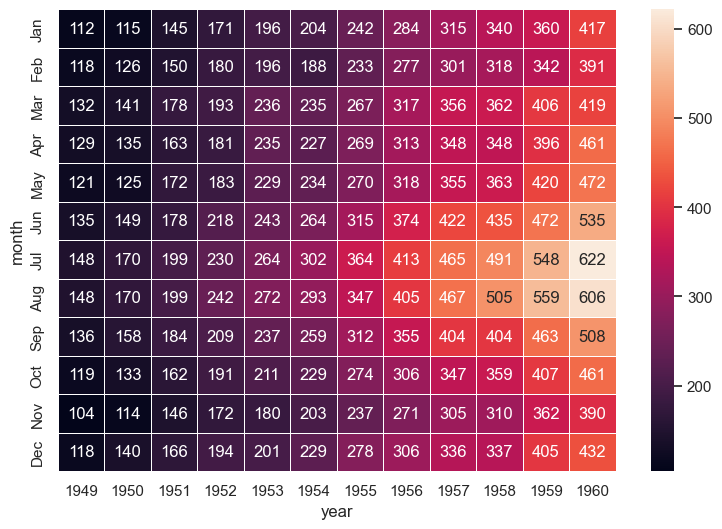

In [36]:
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(flights,annot=True,fmt='d',linewidths=.5,ax=ax)

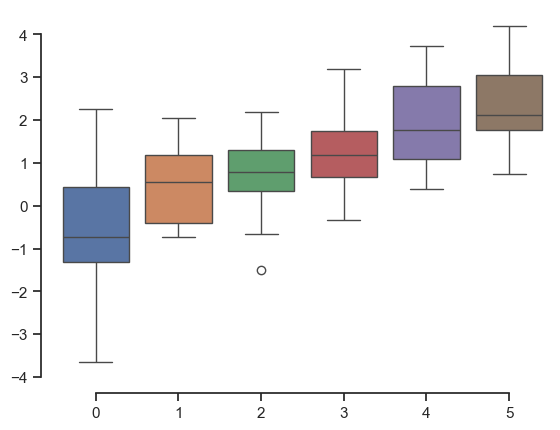

In [47]:
import numpy as np
sns.set_style("ticks")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
sns.despine(offset=10,trim=True);